In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from IPython.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
data = pd.read_csv('DataA.csv', index_col=0)
data_orig = data.copy()
print(data.shape)
display(data.head(5))

In [ ]:
data.describe()

# I. Data Cleaning and Preprocessing (for dataset A)
## 1. Detect any problems that need to be fixed in the dataset A. Report such problems

### Find missing values

In [ ]:
data.isna().sum().sum()

Missing values are indicated by NaN values in the dataframe. We found that there were over 124000 values that were missing in the dataset. 

### Find Outliers

To find outliers the standard deviation of the values was determined and used to find values that vary by more than 3 standard deviations. Since the features are measurements of 

There are over 14000 data points that vary from the features mean by over 3 standard deviations.

## 2. Fix the detected problems using some of the methods discussed in class
### Fix missing values

In [ ]:
# data = data.apply(lambda x: x.fillna(x.mean()),axis=0)
data = data.fillna(data.mean())
print(data.isna().sum().sum())

All the missing values were replaced with the mean value of the feature.

### Fix outliers  
Outliers were detected using the method above. The data points that were identified as outliers were then replaced with the mean value of the feature.

In [ ]:
feat_std = data.std()
feat_mean = data.mean()
threshold = 3

# Find the outliers and label them as true
outliers = data.apply(lambda x: np.abs(x - feat_mean) > threshold * feat_std , axis=1)
print('There are: ', outliers.sum().sum(), 'outliers')

# replace all the outliers with NaN
v = data.values
mask = outliers.values
data = pd.DataFrame(np.where(mask, np.nan, v), data.index, data.columns)
print(data.isna().sum().sum(), ' outliers have been replaced with NaN')

# Replace Nan values with mean()
#data = data.dropna()  # drop all samples with an outlier in one of its features
data = data.fillna(data.mean()) # set the outlier to the mean of the feature

print('There are : ', data.isna().sum().sum(), ' NaN values after the replace')
data.head(10)

## 3. Normalize the data using min-max and z-score normalization. Plot histograms of feature 9 and 24; compare and comment on the differences before and after normalization.

### **Min-max normalization**

In [ ]:
# Calculating min max scaling using sklearn
minmax_scale = preprocessing.MinMaxScaler().fit(data)
data_minmax = minmax_scale.transform(data)
data_minmax = pd.DataFrame(data_minmax)
data_minmax.columns = data.columns
data_minmax.index = data.index
display(data_minmax.describe())
display(data_minmax.head())

### **z-score normalization**

In [ ]:
# calculatig the z-score normalization using sklearn
std_scale = preprocessing.StandardScaler().fit(data)
data_zscore = pd.DataFrame(std_scale.transform(data))
data_zscore.columns = data.columns
data_zscore.index = data.index
display(data_zscore.describe())
display(data_zscore.head())


## Plot histogram for feature 9 and 24

In [ ]:
sns.set()
# set figure size and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1) 
n_bins = int(np.sqrt(len(data.index)))

# plot feature 9 before cleaning
feat9 = data_orig['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 Before Cleaning')
ax.set(ylim=(0,600))
ax.set(xlim=(-1700,1250))

# plot feature 24 before cleaning
plt.subplot(1, 2, 2)
feat24 = data_orig['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 Before Cleaning')
plt.tight_layout()
plt.show()

# set figure size and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 without normalization
feat9 = data['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 Before Normalization')
ax.set(ylim=(0,600))
ax.set(xlim=(-1700,1250))

# plot feature 24 without normalization
plt.subplot(1, 2, 2)
feat24 = data['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 Before Normalization')
ax.set(ylim=(0,600))
ax.set(xlim=(-1700,1250))
plt.tight_layout()
plt.show()

# set figure size and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 with min max
feat9 = data_minmax['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Min Max Normalization')

# plot feature 24 with min max
plt.subplot(1, 2, 2)
feat24 = data_minmax['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Min Max Normalization')
plt.tight_layout()
plt.show()

#set fogure and subplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

# plot feature 9 with z score
feat9 = data_zscore['fea.9']
ax = sns.distplot(feat9, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 9 After Z Score Normalization')

# plot feature 24 with z score
plt.subplot(1, 2, 2)
feat24 = data_zscore['fea.24']
ax = sns.distplot(feat24, kde=False, bins=n_bins)
ax.set(ylabel ='Count', title='Feature 24 After Z Score Normalization')
plt.tight_layout()
plt.show()

# II Feature Extraction (for dataset B)

In [297]:
dataB = pd.read_csv('DataB.csv', index_col=0)
dataB_orig = data.copy()
print(dataB.shape)
display(dataB.head(5))

# separate the feature data from the labels
X = dataB.iloc[:,:-1].values
Y = dataB['gnd'].values

(2066, 785)


,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,fea.41,fea.42,fea.43,fea.44,fea.45,fea.46,fea.47,fea.48,fea.49,fea.50,fea.51,fea.52,fea.53,fea.54,fea.55,fea.56,fea.57,fea.58,fea.59,fea.60,fea.61,fea.62,fea.63,fea.64,fea.65,fea.66,fea.67,fea.68,fea.69,fea.70,fea.71,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81,fea.82,fea.83,fea.84,fea.85,fea.86,fea.87,fea.88,fea.89,fea.90,fea.91,fea.92,fea.93,fea.94,fea.95,fea.96,fea.97,fea.98,fea.99,fea.100,fea.101,fea.102,fea.103,fea.104,fea.105,fea.106,fea.107,fea.108,fea.109,fea.110,fea.111,fea.112,fea.113,fea.114,fea.115,fea.116,fea.117,fea.118,fea.119,fea.120,fea.121,fea.122,fea.123,fea.124,fea.125,fea.126,fea.127,fea.128,fea.129,fea.130,fea.131,fea.132,fea.133,fea.134,fea.135,fea.136,fea.137,fea.138,fea.139,fea.140,fea.141,fea.142,fea.143,fea.144,fea.145,fea.146,fea.147,fea.148,fea.149,fea.150,fea.151,fea.152,fea.153,fea.154,fea.155,fea.156,fea.157,fea.158,fea.159,fea.160,fea.161,fea.162,fea.163,fea.164,fea.165,fea.166,fea.167,fea.168,fea.169,fea.170,fea.171,fea.172,fea.173,fea.174,fea.175,fea.176,fea.177,fea.178,fea.179,fea.180,fea.181,fea.182,fea.183,fea.184,fea.185,fea.186,fea.187,fea.188,fea.189,fea.190,fea.191,fea.192,fea.193,fea.194,fea.195,fea.196,fea.197,fea.198,fea.199,fea.200,fea.201,fea.202,fea.203,fea.204,fea.205,fea.206,fea.207,fea.208,fea.209,fea.210,fea.211,fea.212,fea.213,fea.214,fea.215,fea.216,fea.217,fea.218,fea.219,fea.220,fea.221,fea.222,fea.223,fea.224,fea.225,fea.226,fea.227,fea.228,fea.229,fea.230,fea.231,fea.232,fea.233,fea.234,fea.235,fea.236,fea.237,fea.238,fea.239,fea.240,fea.241,fea.242,fea.243,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,fea.257,fea.258,fea.259,fea.260,fea.261,fea.262,fea.263,fea.264,fea.265,fea.266,fea.267,fea.268,fea.269,fea.270,fea.271,fea.272,fea.273,fea.274,fea.275,fea.276,fea.277,fea.278,fea.279,fea.280,fea.281,fea.282,fea.283,fea.284,fea.285,fea.286,fea.287,fea.288,fea.289,fea.290,fea.291,fea.292,fea.293,fea.294,fea.295,fea.296,fea.297,fea.298,fea.299,fea.300,fea.301,fea.302,fea.303,fea.304,fea.305,fea.306,fea.307,fea.308,fea.309,fea.310,fea.311,fea.312,fea.313,fea.314,fea.315,fea.316,fea.317,fea.318,fea.319,fea.320,fea.321,fea.322,fea.323,fea.324,fea.325,fea.326,fea.327,fea.328,fea.329,fea.330,fea.331,fea.332,fea.333,fea.334,fea.335,fea.336,fea.337,fea.338,fea.339,fea.340,fea.341,fea.342,fea.343,fea.344,fea.345,fea.346,fea.347,fea.348,fea.349,fea.350,fea.351,fea.352,fea.353,fea.354,fea.355,fea.356,fea.357,fea.358,fea.359,fea.360,fea.361,fea.362,fea.363,fea.364,fea.365,fea.366,fea.367,fea.368,fea.369,fea.370,fea.371,fea.372,fea.373,fea.374,fea.375,fea.376,fea.377,fea.378,fea.379,fea.380,fea.381,fea.382,fea.383,fea.384,fea.385,fea.386,fea.387,fea.388,fea.389,fea.390,fea.391,fea.392,fea.393,fea.394,fea.395,fea.396,fea.397,fea.398,fea.399,fea.400,fea.401,fea.402,fea.403,fea.404,fea.405,fea.406,fea.407,fea.408,fea.409,fea.410,fea.411,fea.412,fea.413,fea.414,fea.415,fea.416,fea.417,fea.418,fea.419,fea.420,fea.421,fea.422,fea.423,fea.424,fea.425,fea.426,fea.427,fea.428,fea.429,fea.430,fea.431,fea.432,fea.433,fea.434,fea.435,fea.436,fea.437,fea.438,fea.439,fea.440,fea.441,fea.442,fea.443,fea.444,fea.445,fea.446,fea.447,fea.448,fea.449,fea.450,fea.451,fea.452,fea.453,fea.454,fea.455,fea.456,fea.457,fea.458,fea.459,fea.460,fea.461,fea.462,fea.463,fea.464,fea.465,fea.466,fea.467,fea.468,fea.469,fea.470,fea.471,fea.472,fea.473,fea.474,fea.475,fea.476,fea.477,fea.478,fea.479,fea.480,fea.481,fea.482,fea.483,fea.484,fea.485,fea.486,fea.487,fea.488,fea.489,fea.490,fea.491,fea.492,fea.493,fea.494,fea.495,fea.496,fea.497,fea.498,fea.499,fea.500,fea.501,fea.502,fea.503,fea.504,fea.505,fea.506,fea.507,fea.508,fea.509,fea.510,fea.511,fea.512,fea.513,fea

### Standardize the data for better PCA performance

In [298]:
X = preprocessing.StandardScaler().fit_transform(X)

/home/calkulas/anaconda3/envs/ece657A/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/calkulas/anaconda3/envs/ece657A/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 1. Use PCA as a dimensionality reduction technique to the data, compute the eigenvectors and eigenvalues

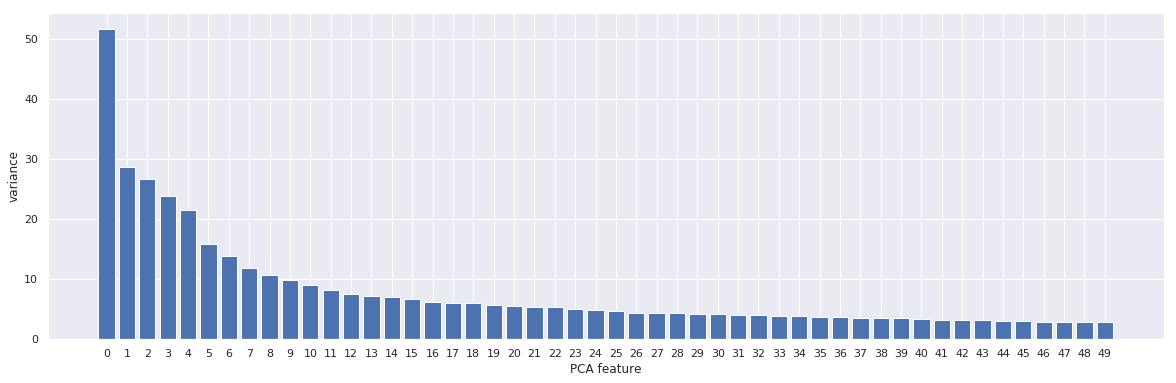

0     51.777319
1     28.800865
2     26.770911
3     23.930346
4     21.575039
5     15.893525
6     13.861941
7     11.912089
8     10.661418
9      9.823583
10     9.113336
11     8.287958
12     7.470221
13     7.186857
14     7.018217
15     6.729239
16     6.171714
17     6.030355
18     5.972188
19     5.745885
20     5.566420
21     5.340855
22     5.309997
23     5.072445
24     4.902200
25     4.740328
26     4.460410
27     4.438758
28     4.375230
29     4.249915
30     4.197361
31     4.131912
32     4.006684
33     3.899598
34     3.821037
35     3.758018
36     3.700872
37     3.572427
38     3.538707
39     3.476093
40     3.378602
41     3.277138
42     3.196151
43     3.187621
44     3.099826
45     3.006451
46     2.956683
47     2.936132
48     2.846674
49     2.804904
dtype: float64

In [299]:
# Create a PCA instance: pca
pca = PCA()

# Fit the data
pca.fit(X)

# Plot the explained variances
n = 50
features = range(pca.n_components_)
plt.figure(figsize=(20, 6))
plt.bar(features[:n], pca.explained_variance_[:n])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features[:n])
plt.show()
eigen_values = pd.Series(pca.explained_variance_)[:n]
display(eigen_values)

In [300]:
# Determine how many features must be kept to retain 95% of the variance
total_variance = np.sum(eigen_values)
num_pca_features = []
for num_components in range(80):
    ratio = np.sum(eigen_values[:num_components]) / total_variance
    num_pca_features.append(ratio)
    print('number of PCs: ', num_components, ' Variance Ratio: ', ratio)

number of PCs:  0  Variance Ratio:  0.0
number of PCs:  1  Variance Ratio:  0.128804922533217
number of PCs:  2  Variance Ratio:  0.20045199077934314
number of PCs:  3  Variance Ratio:  0.2670492016305547
number of PCs:  4  Variance Ratio:  0.32658002360848043
number of PCs:  5  Variance Ratio:  0.3802516178170789
number of PCs:  6  Variance Ratio:  0.41978947518868487
number of PCs:  7  Variance Ratio:  0.45427342092700607
number of PCs:  8  Variance Ratio:  0.4839067755859778
number of PCs:  9  Variance Ratio:  0.5104288740021852
number of PCs:  10  Variance Ratio:  0.5348667136156123
number of PCs:  11  Variance Ratio:  0.5575376934447849
number of PCs:  12  Variance Ratio:  0.5781554051047643
number of PCs:  13  Variance Ratio:  0.5967388547688801
number of PCs:  14  Variance Ratio:  0.6146173883675812
number of PCs:  15  Variance Ratio:  0.632076402257327
number of PCs:  16  Variance Ratio:  0.6488165332208731
number of PCs:  17  Variance Ratio:  0.6641697245952681
number of PCs: 

## 2. Plot a 2 dimensional representation of the data points based on the first and second principal components. Explain the results versus the known classes (display data points of each class with a different color).

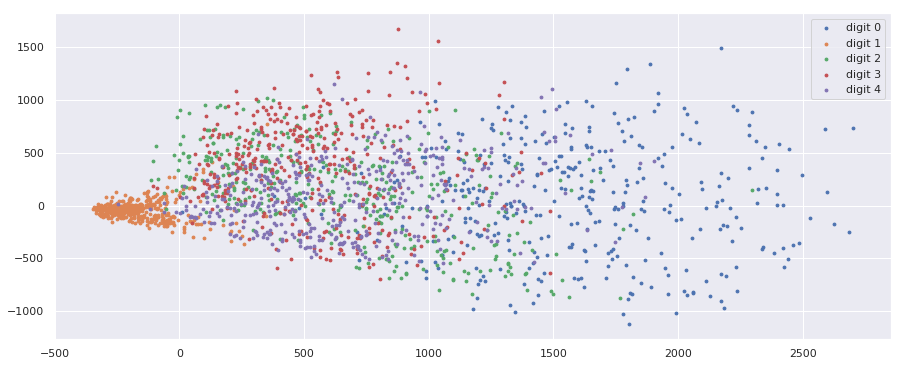

In [312]:
# dimensionality reduction
pca = PCA(n_components=2)

# Fit the data
pca.fit(X)

# Separate the data into subsets based on the labelled digit
classes = []
for label in range(5):
    tmp = dataB.loc[dataB['gnd'] == label]
    tmp = tmp.iloc[:,:-1]
    classes.append(tmp)

# plot all the digits with a different color
plt.figure(figsize=(15,6))
for c in classes:
    transformed = pca.transform(c)
    xs = transformed[:,0]
    ys = transformed[:,1]
    plt.scatter(xs, ys, s=8)
plt.legend(['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4'])

plt.show()

## 3. Repeat step 2 for the 5th and 6th components. Comment on the result.

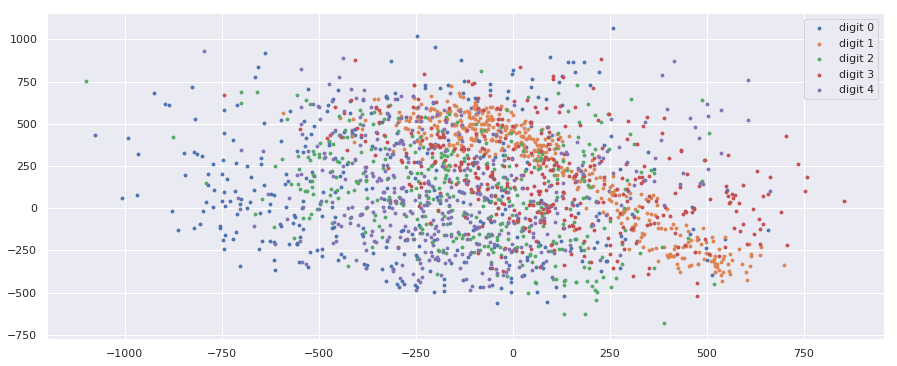

In [330]:
# dimensionality reduction
pca = PCA()

# Fit the data
pca.fit(X)

# Get the 5th and 6th components (eigenvectors)
Hm = pca.components_[5:7] #eigenvectors

# Bm = X @ Hm.T  # transformed values

# Separate the data into subsets based on the labelled digit
classes = []
for label in range(5):
    tmp = dataB.loc[dataB['gnd'] == label]
    tmp = tmp.iloc[:,:-1].values
    classes.append(tmp)

# plot all the digits with a different color
plt.figure(figsize=(15,6))
for c in classes:
    transformed = c @ Hm.T
    xs = transformed[:,0]
    ys = transformed[:,1]
    plt.scatter(xs, ys, s=8)
plt.legend(['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4'])
plt.show()